<a href="https://colab.research.google.com/github/JihyeLimm/Quest/blob/main/230604/Node10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#10. 딥러닝 프로젝트

Boston 주택 값 예측 모델
- 데이터 로드 및 전처리

In [ ]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

print(len(train_data))
print(len(test_data))

404
102


In [ ]:
mean = train_data.mean(axis = 0)
std = train_data.std(axis =0)

train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [ ]:
print(train_data[0])
print(train_labels[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
15.2


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels,
                                                  test_size=0.3,
                                                  random_state=123)

print(f"전체 학습 데이터: {train_data.shape} 레이블: {train_labels.shape}")
print(f"학습 데이터: {x_train.shape} 레이블: {y_train.shape}")
print(f"검증 데이터: {x_val.shape} 레이블: {y_val.shape}")
print(f"테스트 데이터: {test_data.shape} 레이블: {test_labels.shape}")

전체 학습 데이터: (404, 13) 레이블: (404,)
학습 데이터: (282, 13) 레이블: (282,)
검증 데이터: (122, 13) 레이블: (122,)
테스트 데이터: (102, 13) 레이블: (102,)


- 모델 구성 및 컴파일

In [ ]:
x_train.shape

(282, 13)

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 64)                896       
                                                                 
 dense_64 (Dense)            (None, 64)                4160      
                                                                 
 dense_65 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


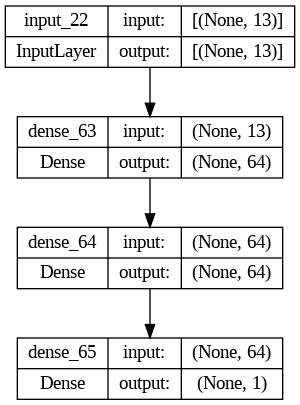

In [ ]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
from tensorflow.keras import callbacks

model = models.Sequential()
model.add(layers.Input(shape=(x_train.shape[1], )))
model.add(layers.Dense(64, activation='relu'))  
#model.add(layers.BatchNormalization()) 
#model.add(layers.Activation('relu')) 
#model.add(layers.Dropout(0.2))  
model.add(layers.Dense(64, activation='relu'))  
model.add(layers.Dense(1,))  
model.summary()


utils.plot_model(model, show_shapes = True)

In [ ]:
model.compile(loss='mse',
              optimizer='Adam',
              metrics=['mae'])

check_point_cb = callbacks.ModelCheckpoint('boston_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(x_train, y_train, 
                    epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
9/9 [==============================] - 1s 30ms/step - loss: 3283.0696 - mae: 46.8873 - val_loss: 1717.8721 - val_mae: 34.6731
Epoch 2/60
9/9 [==============================] - 0s 9ms/step - loss: 1145.0765 - mae: 26.3250 - val_loss: 136.8567 - val_mae: 8.8399
Epoch 3/60
9/9 [==============================] - 0s 9ms/step - loss: 352.2657 - mae: 16.3970 - val_loss: 229.3524 - val_mae: 12.6613
Epoch 4/60
9/9 [==============================] - 0s 7ms/step - loss: 136.6443 - mae: 9.0089 - val_loss: 174.4209 - val_mae: 11.9114
Epoch 5/60
9/9 [==============================] - 0s 9ms/step - loss: 116.1880 - mae: 8.9395 - val_loss: 84.9095 - val_mae: 6.4244
Epoch 6/60
9/9 [==============================] - 0s 9ms/step - loss: 92.4725 - mae: 6.6408 - val_loss: 58.6387 - val_mae: 5.2955
Epoch 7/60
9/9 [==============================] - 0s 9ms/step - loss: 73.0504 - mae: 6.6361 - val_loss: 58.1565 - val_mae: 5.5939
Epoch 8/60
9/9 [==============================] - 0s 7ms/step - loss: 6

<ipython-input-142-eee1a1311e5a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


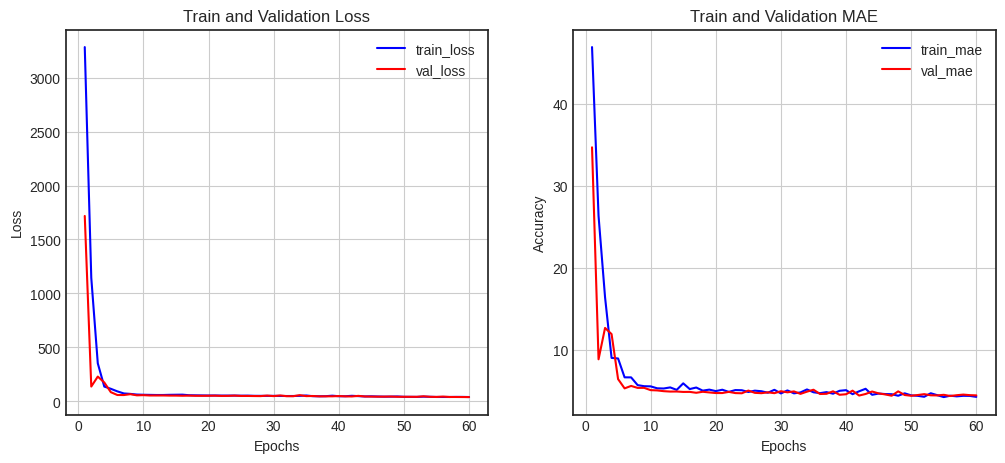

In [ ]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

Reuters 딥러닝 모델
- 데이터 로드 및 전처리: 8,982개의 훈련 데이터셋과 2,246개의 테스트 데이터셋, 46개 뉴스기사 주제

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels,
                                                                  test_size=0.25,
                                                                  random_state=123)

print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

6736
2246
2246
46


In [ ]:
#딕셔너리 확인
word_index = reuters.get_word_index()
index_word = dict([(value, key) for (key, value) in word_index.items()])

In [ ]:
#텍스트 -> 벡터 변환: 원핫인코딩
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)


#레이블데이터
y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

print(train_labels[5], y_train[5])

23 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


- 모델 구성 및 컴파일: batchnormalization & dropout적용

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               1280128   
                                                                 
 batch_normalization_10 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 activation_10 (Activation)  (None, 128)               0         
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_11 (Bat  (None, 128)              512       
 chNormalization)                                     

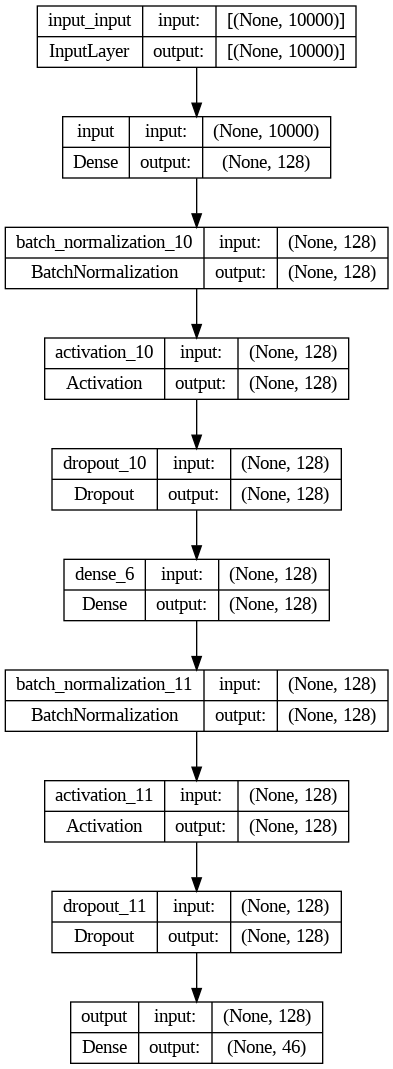

In [ ]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, ), name='input'))
#model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
utils.plot_model(model, show_shapes = True)

- 모델학습

In [ ]:
check_point_cb = callbacks.ModelCheckpoint('reuter_model.h5', save_best_only = True)

early_stopping_cb = callbacks.EarlyStopping(patience = 3, monitor = 'val_loss',
                                            restore_best_weights = True)

history = model.fit(x_train, y_train,
                    epochs = 40,
                    batch_size = 512,
                    validation_data = (x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb], verbose = 1)

Epoch 1/40
14/14 [==============================] - 3s 39ms/step - loss: 3.8775 - accuracy: 0.1467 - val_loss: 3.5837 - val_accuracy: 0.5356
Epoch 2/40
14/14 [==============================] - 0s 18ms/step - loss: 2.4358 - accuracy: 0.4955 - val_loss: 3.3197 - val_accuracy: 0.6073
Epoch 3/40
14/14 [==============================] - 0s 18ms/step - loss: 1.8959 - accuracy: 0.5935 - val_loss: 3.1183 - val_accuracy: 0.6545
Epoch 4/40
14/14 [==============================] - 0s 18ms/step - loss: 1.5861 - accuracy: 0.6606 - val_loss: 2.9896 - val_accuracy: 0.6719
Epoch 5/40
14/14 [==============================] - 0s 18ms/step - loss: 1.3765 - accuracy: 0.6937 - val_loss: 2.9201 - val_accuracy: 0.6843
Epoch 6/40
14/14 [==============================] - 0s 18ms/step - loss: 1.2336 - accuracy: 0.7185 - val_loss: 2.9056 - val_accuracy: 0.6910
Epoch 7/40
14/14 [==============================] - 0s 18ms/step - loss: 1.1367 - accuracy: 0.7383 - val_loss: 2.8254 - val_accuracy: 0.7035
Epoch 8/40
14

- 모델 평가

<ipython-input-19-a9b54256ea89>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


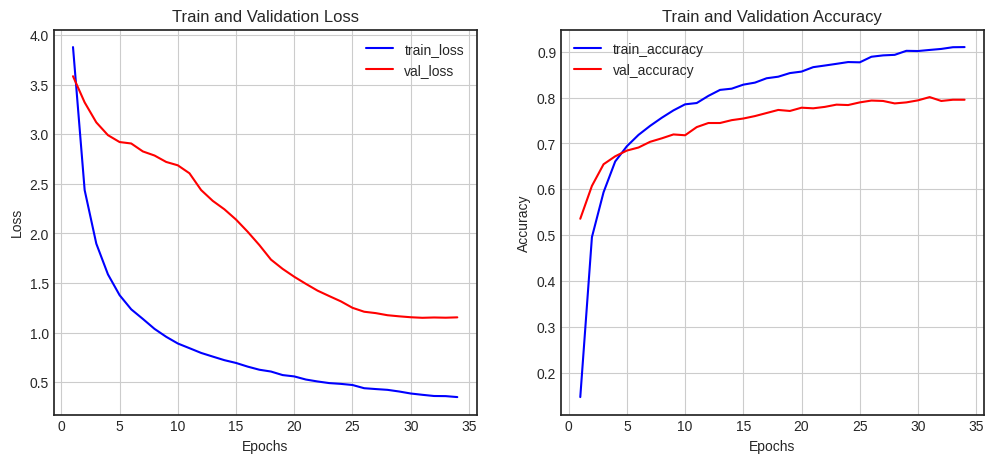

In [ ]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [ ]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.1087 - accuracy: 0.7925


[1.1087042093276978, 0.7925200462341309]

CIFAR10 딥러닝 모델: 32x32 픽셀의 60,000개 컬러 이미지, 10개의 클래스로 라벨링

- 데이터 로드 및 전처리

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10
from collections import Counter

(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=123)

print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


<ipython-input-36-1e559e510a7d>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


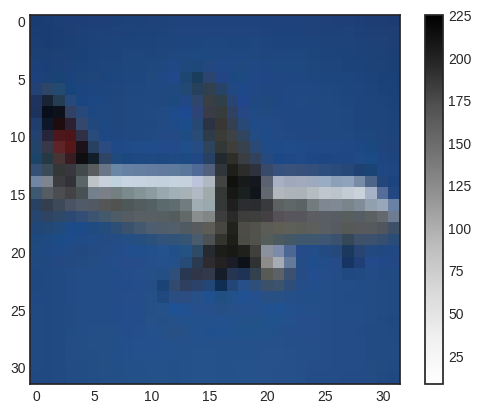

In [ ]:
#클래스 naming
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

#데이터 한개 시각화
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [ ]:
#데이터 형태 변형
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

(40000, 3072)
(10000, 3072)
(10000, 3072)


- 모델 구성 및 컴파일

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 2048)              6293504   
                                                                 
 batch_normalization_15 (Bat  (None, 2048)             8192      
 chNormalization)                                                
                                                                 
 activation_15 (Activation)  (None, 2048)              0         
                                                                 
 dropout_15 (Dropout)        (None, 2048)              0         
                                                                 
 dense_12 (Dense)            (None, 1024)              2098176   
                                                                 
 batch_normalization_16 (Bat  (None, 1024)             4096      
 chNormalization)                                     

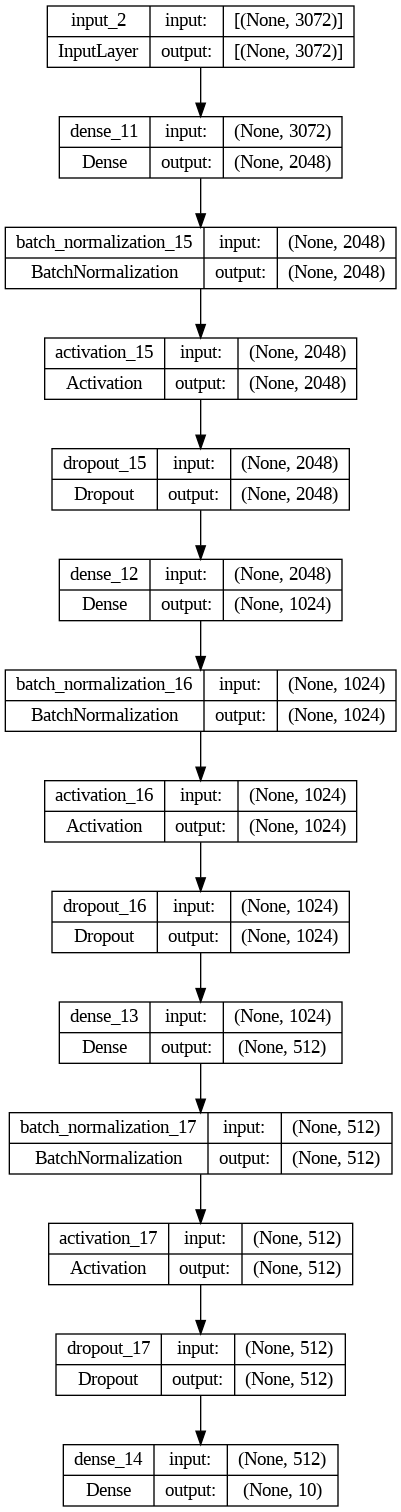

In [ ]:
model = models.Sequential()
model.add(layers.Input(shape=(3072, )))
model.add(layers.Dense(2048, activation='relu')) 
model.add(layers.BatchNormalization())  
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))  
model.add(layers.Dense(1024, activation='relu')) 
model.add(layers.BatchNormalization())  
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))  
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.BatchNormalization())  
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))  
model.add(layers.Dense(10, activation='softmax'))  #model.add(layers.Dense(10, kernel_regularizer = 'l2', activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

model.summary()
utils.plot_model(model, show_shapes = True)

In [ ]:
check_point_cb = callbacks.ModelCheckpoint('cifar10_model.h5', save_best_only = True)

early_stopping_cb = callbacks.EarlyStopping(patience = 10, monitor = 'val_loss',
                                            restore_best_weights = True)

history = model.fit(x_train, y_train, 
                    epochs=800,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/800
1250/1250 [==============================] - 9s 5ms/step - loss: 2.2580 - accuracy: 0.2447 - val_loss: 1.9703 - val_accuracy: 0.3399
Epoch 2/800
1250/1250 [==============================] - 6s 5ms/step - loss: 1.9301 - accuracy: 0.3126 - val_loss: 1.8531 - val_accuracy: 0.3590
Epoch 3/800
1250/1250 [==============================] - 6s 5ms/step - loss: 1.8485 - accuracy: 0.3410 - val_loss: 1.8710 - val_accuracy: 0.3600
Epoch 4/800
1250/1250 [==============================] - 6s 5ms/step - loss: 1.8155 - accuracy: 0.3486 - val_loss: 1.8820 - val_accuracy: 0.3951
Epoch 5/800
1250/1250 [==============================] - 6s 5ms/step - loss: 1.7760 - accuracy: 0.3656 - val_loss: 1.7994 - val_accuracy: 0.4088
Epoch 6/800
1250/1250 [==============================] - 6s 5ms/step - loss: 1.7575 - accuracy: 0.3699 - val_loss: 1.7493 - val_accuracy: 0.4194
Epoch 7/800
1250/1250 [==============================] - 6s 5ms/step - loss: 1.7414 - accuracy: 0.3778 - val_loss: 1.7678 - val_ac

- 모델평가

<ipython-input-45-a9b54256ea89>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


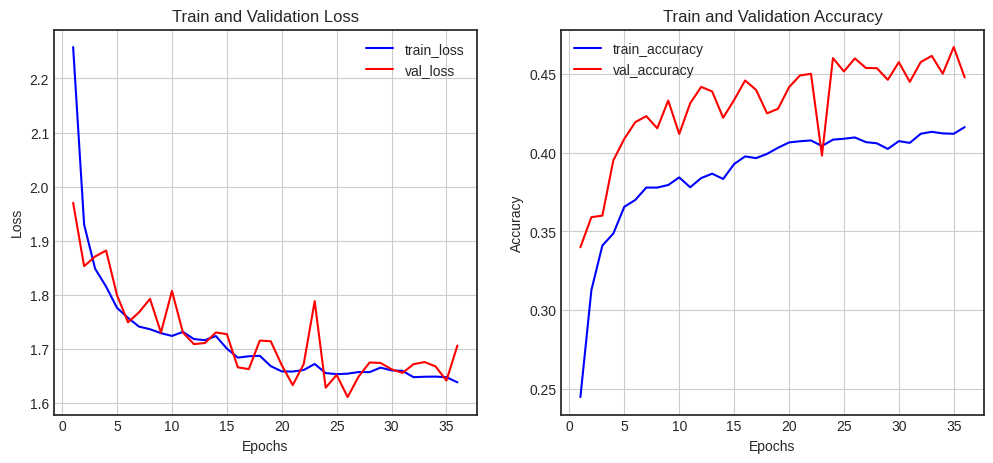

In [ ]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.5635 - accuracy: 0.4645


[1.5634608268737793, 0.4645000100135803]